In [1]:
import pandas as pd
import numpy as np
from os import path

# plots
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

## Analisis Preliminar

In [2]:
df_train = pd.read_csv('./data/Entrenamieto_ECI_2020.csv')


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
ID                                    16947 non-null int64
Region                                16947 non-null object
Territory                             16947 non-null object
Pricing, Delivery_Terms_Quote_Appr    16947 non-null int64
Pricing, Delivery_Terms_Approved      16947 non-null int64
Bureaucratic_Code_0_Approval          16947 non-null int64
Bureaucratic_Code_0_Approved          16947 non-null int64
Submitted_for_Approval                16947 non-null int64
Bureaucratic_Code                     16947 non-null object
Account_Created_Date                  16947 non-null object
Source                                16947 non-null object
Billing_Country                       16947 non-null object
Account_Name                          16947 non-null object
Opportunity_Name                      16947 non-null object
Opportunity_ID                        16947 non-null int6

In [4]:
df_index = df_train.index
df_columns = df_train.columns
df_data = df_train.values

In [5]:
df_index

RangeIndex(start=0, stop=16947, step=1)

In [6]:
df_columns

Index(['ID', 'Region', 'Territory', 'Pricing, Delivery_Terms_Quote_Appr',
       'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval',
       'Bureaucratic_Code', 'Account_Created_Date', 'Source ',
       'Billing_Country', 'Account_Name', 'Opportunity_Name', 'Opportunity_ID',
       'Sales_Contract_No', 'Account_Owner', 'Opportunity_Owner',
       'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms',
       'Opportunity_Created_Date', 'Brand', 'Product_Type', 'Size',
       'Product_Category_B', 'Price', 'Currency', 'Last_Activity',
       'Quote_Expiry_Date', 'Last_Modified_Date', 'Last_Modified_By',
       'Product_Family', 'Product_Name', 'ASP_Currency', 'ASP',
       'ASP_(converted)_Currency', 'ASP_(converted)',
       'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month',
       'Delivery_Quarter', 'Delivery_Year', 'Actual_Delivery_Date', 'TRF',
       'Total_Amount_Currenc

In [7]:
df_data

array([[27761, 'EMEA', 'None', ..., 5272800.0, 'Closed Lost',
        'Prod_Category_A_None'],
       [27760, 'EMEA', 'None', ..., 48230.0, 'Closed Won',
        'Prod_Category_A_None'],
       [27446, 'Americas', 'NW America', ..., 83865.6, 'Closed Won',
        'Prod_Category_A_None'],
       ...,
       [8792, 'EMEA', 'Austria', ..., 299715.0, 'Closed Won',
        'Prod_Category_A_None'],
       [28561, 'Americas', 'NE America', ..., 0.0, 'Closed Lost',
        'Prod_Category_A_None'],
       [28318, 'Americas', 'NE America', ..., 0.0, 'Closed Lost',
        'Prod_Category_A_None']], dtype=object)

In [8]:
#tipo asociados a cada columna

In [9]:
df_train.dtypes

ID                                      int64
Region                                 object
Territory                              object
Pricing, Delivery_Terms_Quote_Appr      int64
Pricing, Delivery_Terms_Approved        int64
Bureaucratic_Code_0_Approval            int64
Bureaucratic_Code_0_Approved            int64
Submitted_for_Approval                  int64
Bureaucratic_Code                      object
Account_Created_Date                   object
Source                                 object
Billing_Country                        object
Account_Name                           object
Opportunity_Name                       object
Opportunity_ID                          int64
Sales_Contract_No                      object
Account_Owner                          object
Opportunity_Owner                      object
Account_Type                           object
Opportunity_Type                       object
Quote_Type                             object
Delivery_Terms                    

In [10]:
df_train.dtypes.value_counts()

object     39
int64       9
float64     4
dtype: int64

In [11]:
df_train.size

881244

In [12]:
df_train.shape

(16947, 52)

In [13]:
df_train.describe()

,ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Opportunity_ID,ASP,ASP_(converted),Delivery_Year,TRF,Total_Amount,Total_Taxable_Amount
count,16947.000000,16947.000000,16947.000000,16947.000000,16947.000000,16947.0,16947.000000,13738.000000,13738.000000,16947.000000,16947.000000,1.688800e+04,1.694700e+04
mean,17666.650440,0.807990,0.583584,0.475482,0.318876,0.0,5335.940225,7.012128,0.432554,2017.137428,2.338172,1.993659e+06,3.224117e+06
std,6940.859372,0.393893,0.492979,0.499413,0.466055,0.0,3324.723809,18.858359,0.758659,0.829603,12.169339,1.848426e+07,2.030360e+07
min,4854.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2016.000000,0.000000,0.000000e+00,0.000000e+00
25%,11953.000000,1.000000,0.000000,0.000000,0.000000,0.0,2448.500000,0.360000,0.373260,2016.000000,0.000000,2.677500e+04,8.546580e+04
50%,18114.000000,1.000000,1.000000,0.000000,0.000000,0.0,5306.000000,0.400000,0.412850,2017.000000,0.000000,1.072500e+05,3.760672e+05
75%,23845.500000,1.000000,1.000000,1.000000,1.000000,0.0,7698.000000,0.505000,0.476490,2018.000000,1.000000,4.603898e+05,1.037450e+06
max,28773.000000,1.000000,1.000000,1.000000,1.000000,0.0,12803.000000,80.000000,67.000000,2020.000000,500.000000,1.320000e+09,1.356339e+09


In [14]:
print(len(df_train))

16947


In [15]:
df_train.dropna(inplace=True)

In [16]:
print(len(df_train))

13684


In [17]:
df_train

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.00,EUR,5272800.00,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.00,EUR,48230.00,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.60,USD,83865.60,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.50,USD,7421881.50,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.50,Closed Lost,Prod_Category_A_None
5,16802,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,28,USD,14838277.50,USD,14838277.50,Closed Lost,Prod_Category_A_None
6,16799,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2017,NaT,7,USD,2659494.60,USD,2659494.60,Closed Lost,Prod_Category_A_None
7,27455,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,50688.00,USD,50688.00,Closed Won,Prod_Category_A_None
12,24358,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,...,Q1,2016,NaT,0,JPY,304200.00,JPY,470400.00,Closed Lost,Prod_Category_A_None
17,24425,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,...,Q1,2016,NaT,0,JPY,385320.00,JPY,559320.00,Closed Lost,Prod_Category_A_None


# Analisis de nulos

In [18]:
def valoresNulos1(columna):
    
    suma_null = columna.isnull().sum()
    total = columna.isnull().count()
    porcentaje_nulos = round(100* suma_null / total,2)
    #print (columna.name.ljust(30)  ,'{:6d}'.format(total) ,'{:19d}'.format(suma_null)  , '{:9.2f}'.format(porcentaje_nulos)+"%")
    return columna.name,total,suma_null,porcentaje_nulos

In [19]:
row=[]
for col1 in df_train.columns:
        row.append(valoresNulos1(df_train[col1]))

In [20]:
dfNulos = pd.DataFrame(row,columns=["Columna", "Total", "Cantidad Nulos", "%Nulos"]) 
dfNulos

,Columna,Total,Cantidad Nulos,%Nulos
0,ID,13684,0,0.0
1,Region,13684,0,0.0
2,Territory,13684,0,0.0
3,"Pricing, Delivery_Terms_Quote_Appr",13684,0,0.0
4,"Pricing, Delivery_Terms_Approved",13684,0,0.0
5,Bureaucratic_Code_0_Approval,13684,0,0.0
6,Bureaucratic_Code_0_Approved,13684,0,0.0
7,Submitted_for_Approval,13684,0,0.0
8,Bureaucratic_Code,13684,0,0.0
9,Account_Created_Date,13684,0,0.0


No se observan campos vacios en el set de datos, sin embargo veremos campos del estilo None en Territory o Nat Actual_Delivery_Date

# Analisis de Regiones y Territorios

## Regiones

In [21]:
df_train.Region.unique()

array(['EMEA', 'Americas', 'Japan', 'APAC', 'Middle East'], dtype=object)

In [22]:
grouped_Region = df_train['Region'].value_counts().to_frame()
grouped_Region = grouped_Region.rename(columns={"Region": "total"})

grouped_Region

,total
EMEA,4656
Americas,3466
APAC,3235
Japan,2143
Middle East,184


In [23]:
grouped_Region.reset_index()

,index,total
0,EMEA,4656
1,Americas,3466
2,APAC,3235
3,Japan,2143
4,Middle East,184


In [24]:
grouped_Region_top5 = grouped_Region['total'].nlargest(5)
grouped_Region_top5

EMEA           4656
Americas       3466
APAC           3235
Japan          2143
Middle East     184
Name: total, dtype: int64

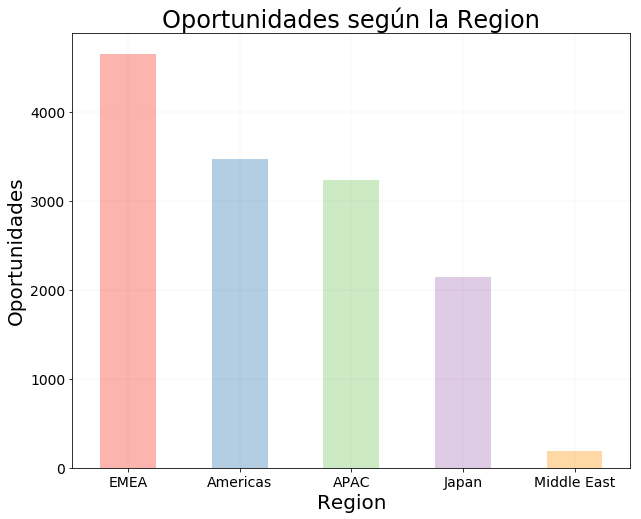

In [25]:

paired_colors = plt.cm.Pastel1(range(len(grouped_Region_top5)))
grouped_Region_top5.plot(kind='bar', rot=0, figsize=(10,8), color=paired_colors, fontsize=14, label='index')
plt.grid(color='grey', linestyle='-', linewidth=0.2, alpha=0.3)
plt.title('Oportunidades según la Region', fontsize=24);
plt.xlabel('Region', fontsize=20);

plt.ylabel('Oportunidades', fontsize=20);

## Territorios

In [26]:
df_train.Territory.unique()

array(['None', 'NW America', 'India', 'Italy', 'Germany',
       'United Kingdom', 'UAE (Dubai)', 'Greece', 'Switzerland',
       'Austria', 'NE America', 'Belgium', 'Japan', 'Tunisia',
       'SE America', 'France', 'Spain', 'Singapore', 'Philippines',
       'SW America', 'Denmark', 'Central America', 'Poland', 'Norway',
       'Thailand', 'Portugal', 'South Korea', 'Australia', 'Netherlands',
       'Kuwait', 'Cambodia', 'Indonesia', 'China (PRC)', 'KSA', 'Ireland',
       'Jordan', 'Cyprus', 'Morocco', 'Turkey', 'Sweden', 'Monaco',
       'Kazakhstan', 'Romania', 'Hungary', 'Taiwan', 'South America',
       'South East Asia', 'Macedonia', 'Ukraine', 'Czech Republic',
       'Belarus', 'Solomon Islands', 'Vietnam', 'Saudi Arabia',
       'Bosnia & Herzegovina', 'Kosovo', 'Luxembourg', 'Bulgaria',
       'UAE (Others)', 'Armenia', 'Croatia', 'Malaysia', 'Georgia',
       'Estonia', 'Pakistan', 'Canada', 'Central US', 'Carribean',
       'Malta', 'New Zealand', 'Albania', 'Oman', 'Bur

In [27]:
#df_train['Territory_unified'] = df_train.Territory
df_train.loc[:,'Territory_unified'] = df_train['Territory']

In [28]:
df_train['Territory_unified'].replace(to_replace =["SE America", "SW America", "NE America", "NW America","Central US"],  
                            value ="United States",inplace=True)

Japon se encuentra como Region independiente, de ese analisis se puede deducir que los casos donde Territory sea None y su region Japon se puede completar para ese territorio

In [29]:
df_train[(df_train.Territory_unified=='None' )&(df_train.Region=='Japan')]['Territory_unified']\
            .replace(to_replace ="None",value ="Japan",inplace=True)


/home/cesar/.local/lib/python3.5/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [30]:
df_train.loc[(df_train.Territory_unified=='None' )&(df_train.Region=='Japan'),'Territory_unified'] = 'Japan'

In [31]:
grouped_Territory = df_train['Territory_unified'].value_counts().reset_index()
grouped_Territory = grouped_Territory.rename(columns={"Territory_unified": "total","index":"Territory_unified"})



In [32]:
grouped_Territory[grouped_Territory['Territory_unified'].str.match('Central US')]

,Territory_unified,total


In [33]:
#sum_United_States = grouped_Territory[ grouped_Territory['Territory'].str.match('Central US') | grouped_Territory['Territory'].str.match('SW America') | grouped_Territory['Territory'].str.match('SE America') | grouped_Territory['Territory'].str.match('NW America') | grouped_Territory['Territory'].str.match('NE America') ]['total'].sum()
#sum_United_States
#row_US = {'Territory':'America', 'total':sum_United_States}
##append row to the dataframe
#grouped_Territory = grouped_Territory.append(row_US,ignore_index=True)


In [34]:
grouped_Territory.set_index('Territory_unified',inplace=True)

In [35]:
grouped_Territory

,total
Territory_unified,
United States,2903
Japan,2143
Germany,1682
Australia,1207
India,809
None,689
Netherlands,533
France,447
Singapore,441


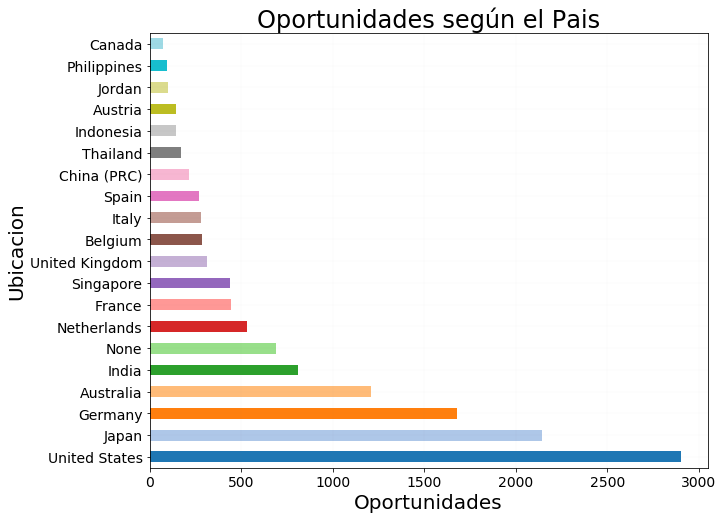

In [36]:
grouped_Territory_top20 = grouped_Territory['total'].nlargest(20)

paired_colors = plt.cm.tab20(range(len(grouped_Territory_top20)))

grouped_Territory_top20.sort_values(ascending=False).plot(kind='barh', rot=0, figsize=(10,8), color=paired_colors, fontsize=14)
plt.grid(color='grey', linestyle='-', linewidth=0.1, alpha=0.3)
plt.title('Oportunidades según el Pais', fontsize=24);
plt.xlabel('Oportunidades', fontsize=20);

plt.ylabel('Ubicacion', fontsize=20);

Se produzco una disminución de los casos None debido a la corrección en la Region de Japon

## Analisis de los None dentro de las Regiones y Territorios

Observando el grafico de Region y de Territorios se observo una alta tasa de territorio sin definir. Al comparar los graficos se observo que Japon se encuentra como Region individual por lo que no coincidia con su ranking de las oportunidades. 

In [37]:


grouped_Region_Terrotory = df_train.groupby(['Region','Territory_unified'])['Region'].count()
grouped_Region_Terrotory = grouped_Region_Terrotory.rename(columns={"Region": "total"})
grouped_Region_Terrotory = grouped_Region_Terrotory.reset_index()
grouped_Region_Terrotory = grouped_Region_Terrotory.rename(columns={0: "total"})
grouped_Region_Terrotory

,Region,Territory_unified,total
0,APAC,Australia,1207
1,APAC,Burma,1
2,APAC,Cambodia,4
3,APAC,China (PRC),218
4,APAC,India,809
5,APAC,Indonesia,145
6,APAC,Malaysia,5
7,APAC,New Zealand,38
8,APAC,Philippines,95
9,APAC,Singapore,441


In [38]:
grouped_Region_Terrotory[grouped_Region_Terrotory.Territory_unified=='None']
grouped_Region_Terrotory[grouped_Region_Terrotory.Territory_unified=='None']

,Region,Territory_unified,total
18,Americas,None,474
51,EMEA,None,185
72,Middle East,None,30


In [56]:
grouped_Region_Terrotory[grouped_Region_Terrotory.Territory_unified=='United States']

,Region,Territory_unified,total
19,Americas,United States,2892
66,EMEA,United States,11


In [61]:
df_train[(df_train.Territory_unified=='United States') & (df_train.Region=='EMEA') ]

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Territory_unified
773,28062,EMEA,SE America,1,1,1,1,0,Bureaucratic_Code_4,7/2/2015,...,2017,NaT,25,USD,9466875.0,USD,22505625.0,Closed Lost,Prod_Category_A_None,United States
774,28063,EMEA,SE America,1,1,1,1,0,Bureaucratic_Code_4,7/2/2015,...,2017,NaT,35,USD,13038750.0,USD,22505625.0,Closed Lost,Prod_Category_A_None,United States
3659,8043,EMEA,SE America,1,0,1,0,0,Bureaucratic_Code_5,7/12/2016,...,2017,NaT,30,USD,12012000.0,USD,60060000.0,Closed Lost,Prod_Category_A_None,United States
3660,8048,EMEA,SE America,1,0,1,0,0,Bureaucratic_Code_5,7/12/2016,...,2017,NaT,30,USD,12012000.0,USD,60060000.0,Closed Lost,Prod_Category_A_None,United States
3661,8056,EMEA,SE America,1,0,1,0,0,Bureaucratic_Code_5,7/12/2016,...,2017,NaT,30,USD,12012000.0,USD,60060000.0,Closed Lost,Prod_Category_A_None,United States
3662,8061,EMEA,SE America,1,0,1,0,0,Bureaucratic_Code_5,7/12/2016,...,2017,NaT,30,USD,12012000.0,USD,60060000.0,Closed Lost,Prod_Category_A_None,United States
3663,8067,EMEA,SE America,1,0,1,0,0,Bureaucratic_Code_5,7/12/2016,...,2017,NaT,30,USD,12012000.0,USD,60060000.0,Closed Lost,Prod_Category_A_None,United States
3667,8037,EMEA,SE America,1,0,1,0,0,Bureaucratic_Code_5,7/12/2016,...,2017,NaT,400,USD,153978825.0,USD,153978825.0,Closed Lost,Prod_Category_A_None,United States
6114,16214,EMEA,SE America,1,1,0,0,0,Bureaucratic_Code_4,7/27/2013,...,2017,NaT,1,EUR,364635.0,EUR,364635.0,Closed Lost,Prod_Category_A_None,United States
16636,18241,EMEA,SE America,1,1,1,1,0,Bureaucratic_Code_4,12/6/2013,...,2016,NaT,1,EUR,609960.0,EUR,609960.0,Closed Lost,Prod_Category_A_None,United States


Como se menciono más arriba el caso de Japon se puede determinar que ese territorio para los otros casos no se puede determinar su Territorio

In [39]:
df_train[(df_train.Territory_unified=='None') & (df_train.Region == 'Americas')]

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Territory_unified
409,17313,Americas,None,1,1,1,1,0,Bureaucratic_Code_4,7/27/2013,...,2016,NaT,2,USD,1051430.63,USD,0.00,Closed Lost,Prod_Category_A_None,None
461,8925,Americas,None,0,0,0,0,0,Bureaucratic_Code_4,1/21/2016,...,2016,NaT,0,USD,187.60,USD,187.60,Closed Won,Prod_Category_A_None,None
577,23006,Americas,None,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,...,2016,NaT,0,USD,3025.05,USD,0.00,Closed Won,Prod_Category_A_None,None
578,17170,Americas,None,1,1,0,0,0,Bureaucratic_Code_4,7/27/2013,...,2016,NaT,0,USD,18900.00,USD,18900.00,Closed Won,Prod_Category_A_None,None
597,17042,Americas,None,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,...,2016,NaT,0,USD,56983.50,USD,56983.50,Closed Won,Prod_Category_A_None,None
607,17892,Americas,None,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,...,2016,NaT,0,USD,14773.50,USD,14773.50,Closed Won,Prod_Category_A_None,None
634,21829,Americas,None,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,...,2016,NaT,0,USD,26592.30,USD,0.00,Closed Won,Prod_Category_A_None,None
661,27486,Americas,None,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,2016,NaT,0,USD,2884.35,USD,2884.35,Closed Won,Prod_Category_A_None,None
662,27488,Americas,None,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,2017,NaT,0,USD,57400.00,USD,57400.00,Closed Lost,Prod_Category_A_None,None
663,17033,Americas,None,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,...,2016,NaT,0,USD,12600.00,USD,12600.00,Closed Won,Prod_Category_A_None,None


#Japon se observa como Region independiente por lo tanto se puede reemplazar los valorse none

Tenemos una gran cantidad de propuestas donde el data se no detalla el origen de la propuesta.

In [40]:
import pygal as pg
  
# create a world map 
#worldmap =  pg.maps.World.SupranationalWorld() 
worldmap = pg.maps.world.World()
# set the title of map 
worldmap.title = 'Continents'
  
# adding the continents 
worldmap.add('Africa', [('africa')]) 
worldmap.add('North america', [('north_america')]) 
worldmap.add('Oceania', [('oceania')]) 
worldmap.add('South america', [('south_america')]) 
worldmap.add('Asia', [('asia')]) 
worldmap.add('Europe', [('europe')]) 
worldmap.add('Antartica', [('antartica')]) 
  
# save into the file 
worldmap.render_to_file('abc.svg') 
  
print("Success") 

Success


In [41]:
#!pip install pygal
#!pip install pygal_maps_world


NameError: name 'world' is not defined

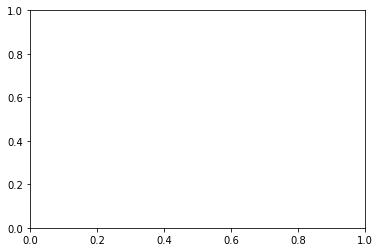

In [42]:
# Plot population estimates with an accurate legend

fig, ax = plt.subplots(1, 1)

world.plot(column='pop_est',
            ax=ax,
            legend=True,
            legend_kwds={'label': "Population by Country",'orientation': "horizontal"})

## Correccion de Nombres de Territorios

Para poder graficar los territorio primero haremos unas revisión de los nombres.
Utilizaresmos geonameschema y compararemos los nombres y buscaremos cuales no aparecen en la api.

In [47]:
#!pip install geonamescache

In [48]:
from geonamescache import GeonamesCache

countries = GeonamesCache().get_countries_by_names()
sorted(set(df_train.Territory_unified.unique()) - set(countries.keys()))

['Bosnia & Herzegovina',
 'Burma',
 'Carribean',
 'Central America',
 'China (PRC)',
 'Czech Republic',
 'KSA',
 'Macedonia',
 'None',
 'South America',
 'South East Asia',
 'UAE (Dubai)',
 'UAE (Others)']

In [54]:
countries.keys()

dict_keys(['Lithuania', 'Jersey', 'Ecuador', 'Reunion', 'Kiribati', 'Cook Islands', 'Uzbekistan', 'Panama', 'Dominica', 'India', 'Denmark', 'Democratic Republic of the Congo', 'Fiji', 'Iran', 'Bahrain', 'Gambia', 'British Indian Ocean Territory', 'Costa Rica', 'Cabo Verde', 'South Africa', 'Afghanistan', 'Palau', 'United Kingdom', 'Bahamas', 'Argentina', 'Togo', 'Netherlands', 'Chad', 'Ghana', 'North Korea', 'Israel', 'Iraq', 'Saudi Arabia', 'Monaco', 'Grenada', 'Bolivia', 'Djibouti', 'Sweden', 'Burkina Faso', 'Bosnia and Herzegovina', 'Japan', 'Nigeria', 'Latvia', 'South Georgia and the South Sandwich Islands', 'Venezuela', 'Timor Leste', 'Czechia', 'Uruguay', 'Zambia', 'Poland', 'Hong Kong', 'Germany', 'Nauru', 'Pakistan', 'Bulgaria', 'Namibia', 'Falkland Islands', 'British Virgin Islands', 'Guadeloupe', 'Slovakia', 'Moldova', 'Guam', 'French Guiana', 'Burundi', 'Mozambique', 'Brazil', 'Republic of the Congo', 'Sao Tome and Principe', 'Morocco', 'Finland', 'Belgium', 'Kyrgyzstan', 'M

In [55]:
sorted(set(df_train.Territory_unified.unique()) - set(countries.keys()))

['Bosnia & Herzegovina',
 'Burma',
 'Carribean',
 'Central America',
 'China (PRC)',
 'Czech Republic',
 'KSA',
 'Macedonia',
 'None',
 'South America',
 'South East Asia',
 'UAE (Dubai)',
 'UAE (Others)']

### Creacion de la columna Region_unified

generamos una nueva columna

In [115]:
df_train.loc[:,'Region_unified'] = df_train.loc[:,'Region'] 

### Reemplazo de Burma por Myanmar y South East Asia

In [81]:
df_train[(df_train.Territory_unified.str.contains('Burma')) ].Region.unique() #& (df_train.Region == 'Americas')

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Territory_unified


In [247]:
#Reemplazo a Burma y South East Asia (si bien es un territorio muy grande son solo 2 registros y Myanmar pertenece a el)
df_train.loc[:,'Territory_unified'] = df_train['Territory_unified'].replace('Burma', 'Myanmar')
df_train.loc[:,'Territory_unified'] = df_train['Territory_unified'].replace('South East Asia', 'Myanmar')



### Correccion en Bosnia & Herzagovina

In [75]:

df_train[(df_train.Territory_unified.str.contains('Bosnia & Herzegovina')) ]

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Territory_unified
4794,13905,EMEA,Bosnia & Herzegovina,1,1,0,0,0,Bureaucratic_Code_4,10/21/2016,...,2016,NaT,0,EUR,81487.50,EUR,81487.50,Closed Lost,Prod_Category_A_None,Bosnia & Herzegovina
4813,10908,EMEA,Bosnia & Herzegovina,1,1,0,0,0,Bureaucratic_Code_4,2/25/2016,...,2016,NaT,0,EUR,64759.38,EUR,194278.14,Closed Lost,Prod_Category_A_None,Bosnia & Herzegovina
4814,10914,EMEA,Bosnia & Herzegovina,1,1,0,0,0,Bureaucratic_Code_4,2/25/2016,...,2016,NaT,0,EUR,64759.38,EUR,194278.14,Closed Lost,Prod_Category_A_None,Bosnia & Herzegovina
4815,10919,EMEA,Bosnia & Herzegovina,1,1,0,0,0,Bureaucratic_Code_4,2/25/2016,...,2016,NaT,0,EUR,64759.38,EUR,194278.14,Closed Lost,Prod_Category_A_None,Bosnia & Herzegovina


In [76]:
#Reemplazo

df_train.loc[:,'Territory_unified'] = df_train['Territory_unified'].replace('Bosnia & Herzegovina', 'Bosnia and Herzegovina')


### Reemplazo de China PRC por China

In [71]:
df_train[(df_train.Territory_unified.str.contains('China')) ] 

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Territory_unified
942,6678,APAC,China (PRC),1,0,1,0,0,Bureaucratic_Code_5,1/23/2017,...,2017,NaT,3,USD,929994.00,USD,929994.00,Closed Lost,Prod_Category_A_None,China (PRC)
1168,9703,APAC,China (PRC),1,1,1,1,0,Bureaucratic_Code_4,1/29/2016,...,2017,NaT,0,USD,4914.00,USD,46262.50,Closed Won,Prod_Category_A_None,China (PRC)
1169,9708,APAC,China (PRC),1,1,1,1,0,Bureaucratic_Code_4,1/29/2016,...,2017,NaT,0,USD,1228.50,USD,46262.50,Closed Won,Prod_Category_A_None,China (PRC)
1170,9714,APAC,China (PRC),1,1,1,1,0,Bureaucratic_Code_4,1/29/2016,...,2017,NaT,0,USD,18020.00,USD,46262.50,Closed Won,Prod_Category_A_None,China (PRC)
1171,9719,APAC,China (PRC),1,1,1,1,0,Bureaucratic_Code_4,1/29/2016,...,2017,NaT,0,USD,18785.00,USD,46262.50,Closed Won,Prod_Category_A_None,China (PRC)
1172,9726,APAC,China (PRC),1,1,1,1,0,Bureaucratic_Code_4,1/29/2016,...,2017,NaT,0,USD,3315.00,USD,46262.50,Closed Won,Prod_Category_A_None,China (PRC)
1512,10258,APAC,China (PRC),1,1,1,1,0,Bureaucratic_Code_4,1/29/2016,...,2017,NaT,0,USD,83475.00,USD,109725.00,Closed Won,Prod_Category_A_None,China (PRC)
1513,10263,APAC,China (PRC),1,1,1,1,0,Bureaucratic_Code_4,1/29/2016,...,2017,NaT,0,USD,26250.00,USD,109725.00,Closed Won,Prod_Category_A_None,China (PRC)
1641,9916,APAC,China (PRC),1,0,1,0,0,Bureaucratic_Code_5,3/2/2017,...,2017,NaT,11,USD,3300030.00,USD,3300030.00,Closed Lost,Prod_Category_A_None,China (PRC)
1907,9193,APAC,China (PRC),1,0,1,0,0,Bureaucratic_Code_5,1/29/2016,...,2016,NaT,2,USD,398090.00,USD,398090.00,Closed Won,Prod_Category_A_None,China (PRC)


In [72]:
# Reemplazo China PRC Por China
df_train.loc[:,'Territory_unified'] = df_train['Territory_unified'].replace('China (PRC)', 'China')


In [67]:
df_train[(df_train.Territory_unified.str.contains('United')) ].Region.unique()

array(['Americas', 'EMEA'], dtype=object)

### Reemplazo de Czech Republic por Czechia

In [73]:
df_train[(df_train.Territory_unified.str.contains('Czech Republic')) ] #& (df_train.Region == 'Americas')

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Territory_unified
3768,8266,EMEA,Czech Republic,0,0,0,0,0,Bureaucratic_Code_4,7/18/2016,...,2016,NaT,0,EUR,101400.0,EUR,101400.0,Closed Lost,Prod_Category_A_None,Czech Republic


In [74]:
#Reemplazo
df_train.loc[:,'Territory_unified'] = df_train['Territory_unified'].replace('Czech Republic', 'Czechia')


### Reemplazo de KZA por Saudi Arabia

In [79]:
df_train[(df_train.Territory_unified.str.contains('KSA')) ]

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Territory_unified
994,18723,Middle East,KSA,1,0,1,0,0,Bureaucratic_Code_5,7/28/2013,...,2017,NaT,120,USD,41999989.50,USD,4.199999e+07,Closed Lost,Prod_Category_A_None,KSA
995,6816,Middle East,KSA,1,0,1,0,0,Bureaucratic_Code_5,1/24/2017,...,2017,NaT,120,USD,41999989.50,USD,4.199999e+07,Closed Lost,Prod_Category_A_None,KSA
4754,23554,Middle East,KSA,1,1,1,1,0,Bureaucratic_Code_4,12/10/2014,...,2016,NaT,0,USD,30240.00,USD,3.024000e+04,Closed Won,Prod_Category_A_None,KSA
5196,15167,Middle East,KSA,1,0,1,0,0,Bureaucratic_Code_5,11/20/2016,...,2017,NaT,2,USD,0.00,USD,0.000000e+00,Closed Lost,Prod_Category_A_None,KSA
6097,11501,Middle East,KSA,1,1,1,1,0,Bureaucratic_Code_4,3/28/2017,...,2017,NaT,0,USD,35012.25,USD,3.501225e+04,Closed Lost,Prod_Category_A_None,KSA
11477,12150,Middle East,KSA,1,1,1,1,0,Bureaucratic_Code_4,12/28/2017,...,2018,NaT,1,USD,412440.00,USD,4.124400e+05,Closed Lost,Prod_Category_A_None,KSA
12879,4863,Middle East,KSA,1,1,1,1,0,Bureaucratic_Code_4,6/12/2017,...,2018,NaT,3,USD,1029105.00,USD,1.029105e+06,Closed Lost,Prod_Category_A_None,KSA
13475,16356,Middle East,KSA,1,1,1,1,0,Bureaucratic_Code_4,6/12/2017,...,2018,NaT,0,USD,73150.00,EUR,6.467192e+04,Closed Lost,Prod_Category_A_None,KSA
13609,16312,Middle East,KSA,1,1,1,1,0,Bureaucratic_Code_4,6/12/2017,...,2018,NaT,0,USD,73150.00,USD,7.315000e+04,Closed Won,Prod_Category_A_None,KSA
14347,16317,Middle East,KSA,1,1,1,1,0,Bureaucratic_Code_4,6/12/2017,...,2018,NaT,0,USD,82473.60,USD,1.440736e+05,Closed Won,Prod_Category_A_None,KSA


In [80]:
#Reemplazo
df_train.loc[:,'Territory_unified'] = df_train['Territory_unified'].replace('KSA', 'Saudi Arabia')


### Reemplazo de Macedonia por North Macedonia

In [212]:
df_train[(df_train.Territory_unified.str.contains('Macedonia')) ]

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Territory_unified,Region_unified
3190,23704,EMEA,Macedonia,0,0,0,0,0,Bureaucratic_Code_4,1/21/2015,...,NaT,0,EUR,32760.0,EUR,32760.0,Closed Won,Prod_Category_A_None,Macedonia,EMEA
12320,15908,EMEA,Macedonia,1,1,0,0,0,Bureaucratic_Code_4,7/27/2013,...,NaT,0,EUR,5655.0,EUR,102783.0,Closed Won,Prod_Category_A_None,Macedonia,EMEA
12321,16391,EMEA,Macedonia,1,1,0,0,0,Bureaucratic_Code_4,7/27/2013,...,NaT,0,EUR,97128.0,EUR,102783.0,Closed Won,Prod_Category_A_None,Macedonia,EMEA
16299,27972,EMEA,Macedonia,1,0,1,0,0,Bureaucratic_Code_5,6/22/2015,...,NaT,1,EUR,549450.0,EUR,549450.0,Closed Lost,Prod_Category_A_None,Macedonia,EMEA
16300,27973,EMEA,Macedonia,1,0,1,0,0,Bureaucratic_Code_5,6/22/2015,...,NaT,1,EUR,0.0,EUR,549450.0,Closed Lost,Prod_Category_A_None,Macedonia,EMEA
16301,27974,EMEA,Macedonia,1,0,1,0,0,Bureaucratic_Code_5,6/22/2015,...,NaT,1,EUR,0.0,EUR,549450.0,Closed Lost,Prod_Category_A_None,Macedonia,EMEA


In [213]:
#Reemplazo
df_train.loc[:,'Territory_unified'] = df_train['Territory_unified'].replace('Macedonia','North Macedonia')



In [214]:
df_train[(df_train.Territory_unified.str.contains('Macedonia')) ]

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Territory_unified,Region_unified
3190,23704,EMEA,Macedonia,0,0,0,0,0,Bureaucratic_Code_4,1/21/2015,...,NaT,0,EUR,32760.0,EUR,32760.0,Closed Won,Prod_Category_A_None,North Macedonia,EMEA
12320,15908,EMEA,Macedonia,1,1,0,0,0,Bureaucratic_Code_4,7/27/2013,...,NaT,0,EUR,5655.0,EUR,102783.0,Closed Won,Prod_Category_A_None,North Macedonia,EMEA
12321,16391,EMEA,Macedonia,1,1,0,0,0,Bureaucratic_Code_4,7/27/2013,...,NaT,0,EUR,97128.0,EUR,102783.0,Closed Won,Prod_Category_A_None,North Macedonia,EMEA
16299,27972,EMEA,Macedonia,1,0,1,0,0,Bureaucratic_Code_5,6/22/2015,...,NaT,1,EUR,549450.0,EUR,549450.0,Closed Lost,Prod_Category_A_None,North Macedonia,EMEA
16300,27973,EMEA,Macedonia,1,0,1,0,0,Bureaucratic_Code_5,6/22/2015,...,NaT,1,EUR,0.0,EUR,549450.0,Closed Lost,Prod_Category_A_None,North Macedonia,EMEA
16301,27974,EMEA,Macedonia,1,0,1,0,0,Bureaucratic_Code_5,6/22/2015,...,NaT,1,EUR,0.0,EUR,549450.0,Closed Lost,Prod_Category_A_None,North Macedonia,EMEA


### Reemplazo de UAE (Dubai) y UAE (Others)  por United Arab Emirates

In [231]:
df_train[(df_train.Territory_unified.str.contains('UAE')) ]

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Territory_unified,Region_unified
78,4904,EMEA,UAE (Dubai),1,0,1,0,0,Bureaucratic_Code_5,12/8/2015,...,NaT,0,USD,7.695000e+03,USD,7695.00,Closed Lost,Prod_Category_A_None,UAE (Dubai),Middle East
399,8737,EMEA,UAE (Dubai),1,1,1,1,0,Bureaucratic_Code_4,1/12/2016,...,NaT,2,USD,7.951060e+05,USD,795106.00,Closed Lost,Prod_Category_A_None,UAE (Dubai),Middle East
999,6839,Middle East,UAE (Dubai),1,1,1,1,0,Bureaucratic_Code_4,1/24/2017,...,NaT,0,USD,5.644170e+04,USD,56441.70,Closed Lost,Prod_Category_A_None,UAE (Dubai),Middle East
1930,10608,EMEA,UAE (Dubai),1,0,1,0,0,Bureaucratic_Code_5,2/5/2016,...,NaT,40,USD,1.980011e+07,USD,19800113.85,Closed Lost,Prod_Category_A_None,UAE (Dubai),Middle East
1932,10597,EMEA,UAE (Dubai),1,1,1,1,0,Bureaucratic_Code_4,2/5/2016,...,NaT,5,USD,2.650021e+06,USD,2650021.20,Closed Lost,Prod_Category_A_None,UAE (Dubai),Middle East
1934,4898,EMEA,UAE (Dubai),1,1,1,1,0,Bureaucratic_Code_4,12/8/2015,...,NaT,25,USD,1.250013e+07,USD,12500130.00,Closed Lost,Prod_Category_A_None,UAE (Dubai),Middle East
2806,4909,EMEA,UAE (Dubai),1,0,1,0,0,Bureaucratic_Code_5,12/8/2015,...,NaT,250,USD,1.237501e+08,USD,0.00,Closed Lost,Prod_Category_A_None,UAE (Dubai),Middle East
2812,14831,EMEA,UAE (Dubai),1,0,1,0,0,Bureaucratic_Code_5,5/9/2016,...,NaT,9,USD,4.524112e+06,USD,4524111.80,Closed Lost,Prod_Category_A_None,UAE (Dubai),Middle East
2813,14815,EMEA,UAE (Dubai),1,0,1,0,0,Bureaucratic_Code_5,5/9/2016,...,NaT,2,USD,1.064781e+06,USD,1064780.60,Closed Lost,Prod_Category_A_None,UAE (Dubai),Middle East
2814,14804,EMEA,UAE (Dubai),1,0,1,0,0,Bureaucratic_Code_5,5/9/2016,...,NaT,1,USD,3.207984e+05,USD,320798.40,Closed Lost,Prod_Category_A_None,UAE (Dubai),Middle East


In [234]:
#Reemplazo
df_train.loc[:,'Territory_unified'] = df_train['Territory_unified'].replace('UAE (Dubai)','United Arab Emirates')
df_train.loc[:,'Territory_unified'] = df_train['Territory_unified'].replace('UAE (Others)','United Arab Emirates')



In [235]:
df_train[(df_train.Territory_unified.str.contains('UAE')) ]

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Territory_unified,Region_unified


### Reemplazo de South America por un pais

In [ ]:
# Brazil Argentina Chile Uruguay Colombia Peru Venezuela Paraguay Ecuador

In [263]:
for ii in ("Brazil","Argentina","Chile", "Uruguay",'Colombia',"Peru", "Ecuador", "Venezuela"):
    print (ii)

Brazil
Argentina
Chile
Uruguay
Colombia
Peru
Ecuador
Venezuela


In [256]:
#dict = {"South America": "Argentina", "South America": "Brazil", "South America": "Chile", "South America": "Uruguay", "South America": "Colombia"}
dict = {"Colombia": "South America"}
df_train = df_train.replace({"Territory_unified": dict})

In [258]:
df_train[(df_train.Territory.str.contains('South America')) ]

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Territory_unified,Region_unified
2384,18235,EMEA,South America,1,0,1,0,0,Bureaucratic_Code_5,12/6/2013,...,NaT,1,USD,349440.00,USD,349440.00,Closed Lost,Prod_Category_A_None,South America,Americas
4700,13694,EMEA,South America,1,1,1,1,0,Bureaucratic_Code_4,10/15/2016,...,NaT,1,USD,459270.00,USD,459270.00,Closed Lost,Prod_Category_A_None,South America,Americas
4753,13805,EMEA,South America,1,1,1,1,0,Bureaucratic_Code_4,10/18/2016,...,NaT,0,USD,72800.00,USD,72800.00,Closed Lost,Prod_Category_A_None,South America,Americas
5257,11449,EMEA,South America,1,1,1,1,0,Bureaucratic_Code_4,9/23/2016,...,NaT,3,USD,1092000.00,EUR,965437.20,Closed Lost,Prod_Category_A_None,South America,Americas
6671,23990,EMEA,South America,1,1,1,1,0,Bureaucratic_Code_4,4/7/2015,...,NaT,47,EUR,17327100.00,EUR,34409861.25,Closed Lost,Prod_Category_A_None,South America,Americas
6672,23991,EMEA,South America,1,1,1,1,0,Bureaucratic_Code_4,4/7/2015,...,NaT,46,EUR,17082761.25,EUR,34409861.25,Closed Lost,Prod_Category_A_None,South America,Americas
11754,13718,EMEA,South America,1,1,1,1,0,Bureaucratic_Code_4,3/29/2018,...,NaT,7,EUR,2201355.00,EUR,6501105.00,Closed Lost,Prod_Category_A_None,South America,Americas
11755,13725,EMEA,South America,1,1,1,1,0,Bureaucratic_Code_4,3/29/2018,...,NaT,13,EUR,4299750.00,EUR,6501105.00,Closed Lost,Prod_Category_A_None,South America,Americas
15895,13046,EMEA,South America,1,1,1,1,0,Bureaucratic_Code_4,2/19/2018,...,NaT,20,USD,5309550.00,USD,5309550.00,Proposal,Prod_Category_A_None,South America,Americas


### Control Final

Vuelvo a ejecutar el control para ver cuales son las diferencias

In [248]:
sorted(set(df_train.Territory_unified.unique()) - set(countries.keys()))

['Carribean', 'Central America', 'None', 'South America']

In [ ]:
row=[]
for col1 in df_train.columns:
        row.append(valoresNulos1(df_train[col1]))

In [ ]:
United Arab Emirates

## Correccion en Regiones

Del primer analisis de territorios se observaron casos donde para un mismo Territorio estaba asignado a más de una región. Se buscarán si exiten más casos

In [156]:
grouped_Territory_Region = df_train.groupby(['Territory','Region'])['Region'].count().to_frame()
grouped_Territory_Region
grouped_Territory_Region = grouped_Territory_Region.rename(columns={"Region": "total"})
grouped_Territory_Region

,,total
Territory,Region,
Albania,EMEA,2
Armenia,EMEA,2
Australia,APAC,1207
Austria,EMEA,145
Belarus,EMEA,4
Belgium,EMEA,285
Bosnia & Herzegovina,EMEA,4
Bulgaria,EMEA,5
Burma,APAC,1


### Cantidad de Regiones y Territorios

In [193]:
agrouped_Territory_Region_count = grouped_Territory_Region.groupby('Territory')['total'].count().to_frame()

In [194]:
agrouped_Territory_Region_count[agrouped_Territory_Region_count.total > 1]

,total
Territory,
Jordan,2
KSA,2
None,4
SE America,2
SW America,2
UAE (Dubai),2


estos son los casos que tienen 2 o mas regiones asignadas

### Correccion para KSA - Saudi Arabia

Para KSA surgieron 2 Regiones. Se debe corregir las regiones que sean de Saudi Arabia y Region EMEA. Pasara a ser Middle East

In [120]:
df_train.loc[(df_train['Region'].str.match('EMEA')) & (df_train['Territory'].str.match('KSA')),'Region_unified'] = df_train.loc[(df_train['Region'].str.match('EMEA')) & (df_train['Territory'].str.match('KSA')),'Region_unified'].replace('EMEA', 'Middle East')

In [83]:
df_train

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Territory_unified,Region_unified
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,NaT,10,EUR,5272800.00,EUR,5272800.00,Closed Lost,Prod_Category_A_None,None,EMEA
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,NaT,0,EUR,48230.00,EUR,48230.00,Closed Won,Prod_Category_A_None,None,EMEA
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,NaT,0,USD,83865.60,USD,83865.60,Closed Won,Prod_Category_A_None,United States,Americas
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,NaT,14,USD,7421881.50,USD,7421881.50,Closed Lost,Prod_Category_A_None,United States,Americas
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,NaT,25,USD,13357192.50,USD,13357192.50,Closed Lost,Prod_Category_A_None,United States,Americas
5,16802,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,NaT,28,USD,14838277.50,USD,14838277.50,Closed Lost,Prod_Category_A_None,United States,Americas
6,16799,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,NaT,7,USD,2659494.60,USD,2659494.60,Closed Lost,Prod_Category_A_None,United States,Americas
7,27455,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,4/21/2015,...,NaT,0,USD,50688.00,USD,50688.00,Closed Won,Prod_Category_A_None,United States,Americas
12,24358,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,...,NaT,0,JPY,304200.00,JPY,470400.00,Closed Lost,Prod_Category_A_None,Japan,Japan
17,24425,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,...,NaT,0,JPY,385320.00,JPY,559320.00,Closed Lost,Prod_Category_A_None,Japan,Japan


In [122]:
df_train[(df_train['Region'].str.match('EMEA')) & (df_train['Territory'].str.match('KSA'))]

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Territory_unified,Region_unified
15192,16295,EMEA,KSA,1,1,1,1,0,Bureaucratic_Code_4,6/12/2017,...,NaT,0,USD,57750.0,USD,57750.0,Closed Won,Prod_Category_A_None,Saudi Arabia,Middle East
16029,4858,EMEA,KSA,1,1,1,1,0,Bureaucratic_Code_4,6/12/2017,...,NaT,0,USD,73689.0,USD,73689.0,Closed Won,Prod_Category_A_None,Saudi Arabia,Middle East


In [131]:
df_train[(df_train['Territory_unified'].str.match('United States'))]['Region'].unique()

array(['Americas', 'EMEA'], dtype=object)

In [132]:


df_train.loc[(df_train['Region'].str.match('EMEA')) & (df_train['Territory_unified'].str.match('United States')),'Region_unified'] = df_train.loc[(df_train['Region'].str.match('EMEA')) & (df_train['Territory_unified'].str.match('United States')),'Region_unified'].replace('EMEA', 'Americas')


In [ ]:
df_train[(df_train['Territory_unified'].str.match('United States'))]['Region'].unique()

In [133]:
df_train[df_train.Region !=  df_train.Region_unified]

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Territory_unified,Region_unified
773,28062,EMEA,SE America,1,1,1,1,0,Bureaucratic_Code_4,7/2/2015,...,NaT,25,USD,9466875.0,USD,22505625.0,Closed Lost,Prod_Category_A_None,United States,Americas
774,28063,EMEA,SE America,1,1,1,1,0,Bureaucratic_Code_4,7/2/2015,...,NaT,35,USD,13038750.0,USD,22505625.0,Closed Lost,Prod_Category_A_None,United States,Americas
3659,8043,EMEA,SE America,1,0,1,0,0,Bureaucratic_Code_5,7/12/2016,...,NaT,30,USD,12012000.0,USD,60060000.0,Closed Lost,Prod_Category_A_None,United States,Americas
3660,8048,EMEA,SE America,1,0,1,0,0,Bureaucratic_Code_5,7/12/2016,...,NaT,30,USD,12012000.0,USD,60060000.0,Closed Lost,Prod_Category_A_None,United States,Americas
3661,8056,EMEA,SE America,1,0,1,0,0,Bureaucratic_Code_5,7/12/2016,...,NaT,30,USD,12012000.0,USD,60060000.0,Closed Lost,Prod_Category_A_None,United States,Americas
3662,8061,EMEA,SE America,1,0,1,0,0,Bureaucratic_Code_5,7/12/2016,...,NaT,30,USD,12012000.0,USD,60060000.0,Closed Lost,Prod_Category_A_None,United States,Americas
3663,8067,EMEA,SE America,1,0,1,0,0,Bureaucratic_Code_5,7/12/2016,...,NaT,30,USD,12012000.0,USD,60060000.0,Closed Lost,Prod_Category_A_None,United States,Americas
3667,8037,EMEA,SE America,1,0,1,0,0,Bureaucratic_Code_5,7/12/2016,...,NaT,400,USD,153978825.0,USD,153978825.0,Closed Lost,Prod_Category_A_None,United States,Americas
6114,16214,EMEA,SE America,1,1,0,0,0,Bureaucratic_Code_4,7/27/2013,...,NaT,1,EUR,364635.0,EUR,364635.0,Closed Lost,Prod_Category_A_None,United States,Americas
15192,16295,EMEA,KSA,1,1,1,1,0,Bureaucratic_Code_4,6/12/2017,...,NaT,0,USD,57750.0,USD,57750.0,Closed Won,Prod_Category_A_None,Saudi Arabia,Middle East


### Correccion de South America como territorio EMEA


In [219]:
df_train[(df_train['Territory_unified'].str.match('South America'))]['Region'].unique()

array(['EMEA'], dtype=object)

In [220]:
df_train.loc[(df_train['Region'].str.match('EMEA')) & (df_train['Territory'].str.match('South America')),'Region_unified'] = \
df_train.loc[(df_train['Region'].str.match('EMEA')) & (df_train['Territory'].str.match('South America')),'Region_unified'].replace('EMEA', 'Americas')


In [221]:
df_train[(df_train['Territory'].str.match('South America'))]['Region_unified'].unique()

array(['Americas'], dtype=object)

In [192]:
grouped_Territory_Region = grouped_Territory_Region.reset_index()
grouped_Territory_Region

,Territory,Region,total
0,Albania,EMEA,2
1,Armenia,EMEA,2
2,Australia,APAC,1207
3,Austria,EMEA,145
4,Belarus,EMEA,4
5,Belgium,EMEA,285
6,Bosnia & Herzegovina,EMEA,4
7,Bulgaria,EMEA,5
8,Burma,APAC,1
9,Cambodia,APAC,4


### Correccion de Region para Jordan

In [224]:
df_train[(df_train['Territory_unified'].str.match('Jordan'))]['Region'].unique()

array(['Middle East', 'EMEA'], dtype=object)

In [172]:
df_train[(df_train['Territory_unified'].str.match('Jordan'))]

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Territory_unified,Region_unified
1078,6856,Middle East,Jordan,1,1,1,1,0,Bureaucratic_Code_4,1/27/2017,...,NaT,248,USD,86659980.75,USD,86659980.75,Closed Lost,Prod_Category_A_None,Jordan,Middle East
1188,7412,Middle East,Jordan,1,1,1,1,0,Bureaucratic_Code_4,2/6/2017,...,NaT,0,USD,174944.00,USD,484220.00,Closed Lost,Prod_Category_A_None,Jordan,Middle East
1189,7417,Middle East,Jordan,1,1,1,1,0,Bureaucratic_Code_4,2/6/2017,...,NaT,1,USD,309276.00,USD,484220.00,Closed Lost,Prod_Category_A_None,Jordan,Middle East
1395,13037,Middle East,Jordan,1,1,1,1,0,Bureaucratic_Code_4,3/17/2016,...,NaT,1,USD,204120.00,USD,276382.50,Closed Lost,Prod_Category_A_None,Jordan,Middle East
1396,13042,Middle East,Jordan,1,1,1,1,0,Bureaucratic_Code_4,3/17/2016,...,NaT,0,USD,46027.50,USD,276382.50,Closed Lost,Prod_Category_A_None,Jordan,Middle East
1397,13048,Middle East,Jordan,1,1,1,1,0,Bureaucratic_Code_4,3/17/2016,...,NaT,0,USD,26235.00,USD,276382.50,Closed Lost,Prod_Category_A_None,Jordan,Middle East
1520,9550,Middle East,Jordan,1,1,1,1,0,Bureaucratic_Code_4,2/21/2017,...,NaT,0,USD,110200.00,USD,110200.00,Closed Lost,Prod_Category_A_None,Jordan,Middle East
1590,9750,Middle East,Jordan,1,1,0,0,0,Bureaucratic_Code_4,2/27/2017,...,NaT,0,USD,40800.00,USD,83010.00,Closed Won,Prod_Category_A_None,Jordan,Middle East
1591,9756,Middle East,Jordan,1,1,0,0,0,Bureaucratic_Code_4,2/27/2017,...,NaT,0,USD,42210.00,USD,83010.00,Closed Won,Prod_Category_A_None,Jordan,Middle East
1608,7428,Middle East,Jordan,1,1,1,1,0,Bureaucratic_Code_4,2/6/2017,...,NaT,1,USD,450450.00,USD,450450.00,Closed Lost,Prod_Category_A_None,Jordan,Middle East


In [222]:
df_train.loc[(df_train['Region'].str.match('EMEA')) & (df_train['Territory'].str.match('Jordan')),'Region_unified'] = \
df_train.loc[(df_train['Region'].str.match('EMEA')) & (df_train['Territory'].str.match('Jordan')),'Region_unified'].replace('EMEA', 'Middle East')


In [223]:
df_train[(df_train['Territory_unified'].str.match('Jordan'))]['Region_unified'].unique()

array(['Middle East'], dtype=object)

### Correccion de Region para UAE (Dubai)

In [225]:

df_train[(df_train['Territory_unified'].str.contains('UAE'))]['Region'].unique()

array(['EMEA', 'Middle East'], dtype=object)

In [226]:
grouped_Territory_Region[grouped_Territory_Region['Territory'].str.match('UAE')]

,Territory,Region,total
78,UAE (Dubai),EMEA,12
79,UAE (Dubai),Middle East,19
80,UAE (Others),Middle East,2


In [227]:
df_train.loc[(df_train['Region'].str.match('EMEA')) & (df_train['Territory'].str.match('UAE \(Dubai\)')),'Region_unified'] = \
df_train.loc[(df_train['Region'].str.match('EMEA')) & (df_train['Territory'].str.match('UAE \(Dubai\)')),'Region_unified'].replace('EMEA', 'Middle East')


In [228]:
df_train[(df_train['Territory_unified'].str.match('UAE \(Dubai\)'))]['Region_unified'].unique()

array(['Middle East'], dtype=object)

### Correccion de Region para SE America y SW America 

Estos casos no fueron corregidos ya que se realizo en un primer analisis

## Analisis de Regiones y Territorios 2

In [207]:
grouped_Region = df_train['Region_unified'].value_counts().to_frame()
grouped_Region = grouped_Region.rename(columns={"Region_unified": "total"})

grouped_Region

,total
EMEA,4621
Americas,3486
APAC,3235
Japan,2143
Middle East,199


In [208]:
grouped_Region_top5 = grouped_Region['total'].nlargest(5)
grouped_Region_top5

EMEA           4621
Americas       3486
APAC           3235
Japan          2143
Middle East     199
Name: total, dtype: int64

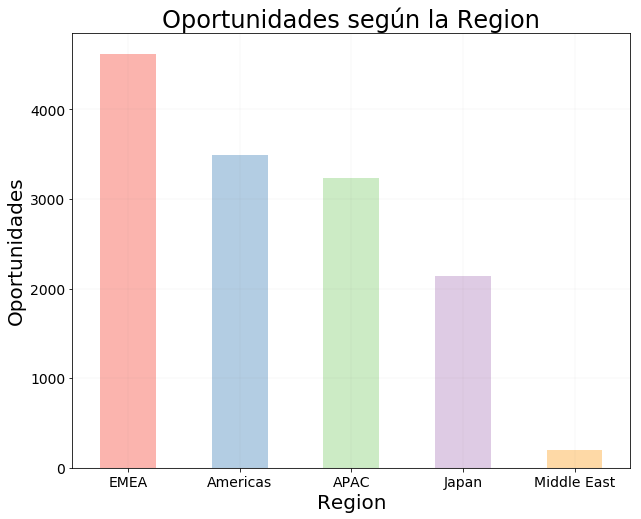

In [209]:
13684
paired_colors = plt.cm.Pastel1(range(len(grouped_Region_top5)))
grouped_Region_top5.plot(kind='bar', rot=0, figsize=(10,8), color=paired_colors, fontsize=14, label='index')
plt.grid(color='grey', linestyle='-', linewidth=0.2, alpha=0.3)
plt.title('Oportunidades según la Region', fontsize=24);
plt.xlabel('Region', fontsize=20);

plt.ylabel('Oportunidades', fontsize=20);